 ##              <font color = red size =15> Solution of Logistic Regression Case Study </font>

## <font color = Violet size = 5> Model for **Improvement in Lead Convertion Rate**.</font>


<br>

<font color = Brown size = 5>  __Problem Statement :__

An education company named **X Education sells online courses to industry professionals**. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

The typical lead conversion rate at X education is around **30%**. The company wishes to identify the most potential leads, also known as **Hot Leads**.

The company requires you to **build a model** wherein you need to **assign a lead score to each of the leads** such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The **CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%**.

<font color = GoldBlack size = 5>  __Objective:__ </font>
<font size = 4 > 
> -  Identifying the **Driving factors** for this Lead Convertions to cutomers. 
<br>    
<br>
> -  Build a logistic regression model to assign a lead score between 0 & 100 to each of the leads which can be used by the company to target potential leads. . 
<br>
    <br>
<br>    
>-   A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
<br>
<br>    
</font>

<font color = Pink size = 5> __Solution:__

 The solution is divided into the following sections:


* Data preparation
* EDA
* Scaling 
* Logistic Regression
* Specifity, Sensitivity  
* Suggestions/Recommondation's

In [235]:
#Importing required Packages: 

In [236]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [237]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

<font size = 5 color = Skyblue> **Data Preparation:** </font>    
<br>

<font size = 5 color = Brown> **Data Loading:** </font>    


In [238]:
#Loading the Leads Dataset:
lead_study = pd.read_csv(r"Leads.csv")
#To Display all the columns in the Dataset w/o trimming.
pd.options.display.max_columns = None
lead_study.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


<font size = 5 color = Brown> **Data Inspection:** </font>    
    <br>

In [239]:
lead_study.shape

(9240, 37)

In [240]:
#checking the id's are unique or not
sum(lead_study.duplicated(subset = 'Prospect ID')) == 0

True

In [241]:
lead_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [242]:
lead_study.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


<font size = 5 color = blue> **Inference:** </font>    

- lead_study df have **9240 rows & 37 columns** only.  
- Cross verified there is no entry without **'Prospect ID'**
- **Numeric Columns are**: Lead Number	Converted	TotalVisits	Total Time Spent on Website	Page Views Per Visit	Asymmetrique Activity Score	Asymmetrique Profile Score.
- Rest of them either categorical columns. 
- The target variable is: ‘Converted’ feature which Indicates whether a past lead was converted or not where in **1 means it was converted and 0 means it wasn’t converted**.

<font size = 5 color = Brown> **Data Cleaning:** </font>    
    <br>

<font size = 5 color = GREEN> __Handling Missing values__:</font>
    

In [243]:
#Checking the Null values in dataframe rows:
lead_study.isnull().sum(axis =1).any()

True

<font size = 5 color = blue> **Inference:** </font>    

- lead_study df have null values. So, we need to handle the missing values.

In [244]:
# For categorical features we are  having **select** are as good as null, so converting 'Select' values to NaN.
lead_study = lead_study.replace('Select', np.nan)

In [245]:
#Checking the Null percentages for all the features:
missing_percentages = round(100*(lead_study.isnull().sum()/len(lead_study.index)), 2)

In [246]:
missing_percentages

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

<font size = 5 color = blue> **Inference:** </font>    
    
**Major columns which are having more than 70% NA values:**
- Lead profile - (74.2%) 
- How did you hear about X Education column - (78.5%) 


In [247]:
# we will drop the columns having more than 70% NA values.
lead_study = lead_study.drop(lead_study.loc[:,list(missing_percentages>70)].columns, 1)

In [248]:
#Checking the Null percentages for all the features:
missing_percentages2 = round(100*(lead_study.isnull().sum()/len(lead_study.index)), 2)
missing_percentages2

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

<font size = 5 color = blue> **Inference:** </font>    
    
**Dropped more than 70% NA values features **
- Now __Lead Quality__ is the highest NA percentage - (51.6%) 

<font size = 5 color = Green> **Let's take care of null values in other columns as well one after the other:** </font>

#### <font color = Babypink> **Lead Quality feature:** </font>  
> Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead

In [249]:
#Handling 'Lead Quality' feature:
lead_study['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

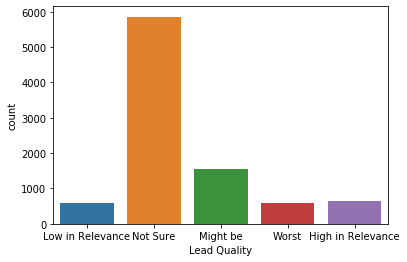

In [250]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
lead_study['Lead Quality'] = lead_study['Lead Quality'].replace(np.nan, 'Not Sure')
#plotting 'Lead Quality' feature countplot:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(lead_study['Lead Quality'])

#### <font color = Babypink> **Asymmetrique 4 feature's:** </font>  
> Indicates an index and score assigned to each customer based on their activity and their profile

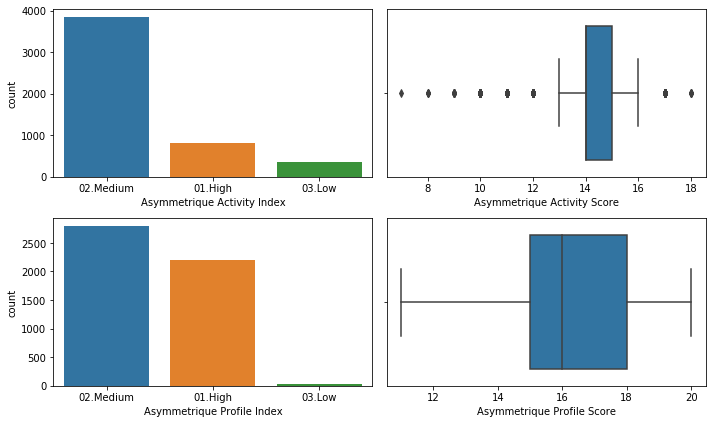

In [251]:
#plotting countplot & boxplot's of Astnetrique features:
fig, axs = plt.subplots(2,2, figsize = (10,6))
plt1 = sns.countplot(lead_study['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(lead_study['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead_study['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(lead_study['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

<font size = 5 color = blue> **Inference:** </font>   
- There is too much variation in these below parameters, so it's not reliable to impute any value in it. 
- Around 45% null values means we need to drop these columns.

<font size = 3 color = GREEN> __Variance in Data__:</font>

In [252]:
lead_study.var()

Lead Number                   547840634.64
Converted                             0.24
TotalVisits                          23.57
Total Time Spent on Website      300327.53
Page Views Per Visit                  4.67
Asymmetrique Activity Score           1.92
Asymmetrique Profile Score            3.28
dtype: float64

In [253]:
#Dropping those 4 Asymmetrique features:
lead_study = lead_study.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [254]:
#Checking the Null percentages for all the features:
missing_percentages3 = round(100*(lead_study.isnull().sum()/len(lead_study.index)), 2)
missing_percentages3

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

<font size = 5 color = blue> **Inference:** </font>   
- Less than 40% missing values are there in the rest of columns.
- Next Highest null values are in city,Specialization,Tags features. Let's Handle it.

In [255]:
#City feature:
lead_study.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

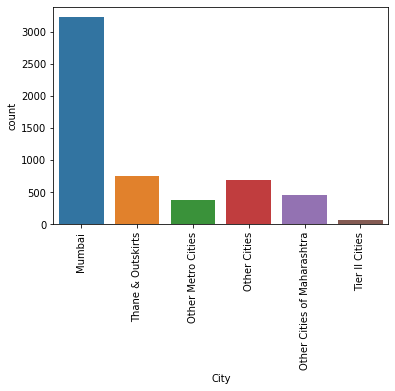

In [256]:
#plotting City feature countplot:
sns.countplot(lead_study.City)
plt.xticks(rotation = 90)

In [257]:
# Around 60% of the data is from Mumbai city itself, so we can impute Mumbai in the missing values.
lead_study['City'] = lead_study['City'].replace(np.nan, 'Mumbai')

In [258]:
# Specailization
lead_study.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

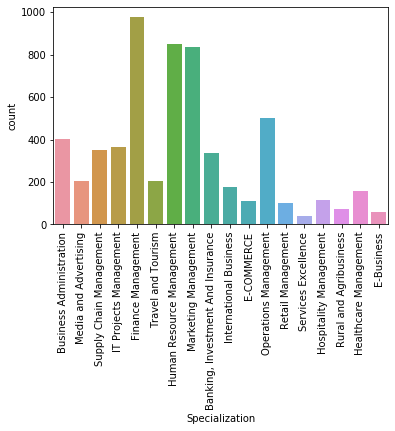

In [259]:
#plotting Specialization feature countplot:
sns.countplot(lead_study.Specialization)
plt.xticks(rotation = 90)

In [260]:
# If lead not specified any specialization means either, they don't have any specialization or 'Student'.
# Hence we can make a category "Others" for missing values. 
lead_study['Specialization'] = lead_study['Specialization'].replace(np.nan, 'Others')
missing_percentages4 = round(100*(lead_study.isnull().sum()/len(lead_study.index)), 2)
missing_percentages4

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                   0.00
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [261]:
# Tags feature:
lead_study.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

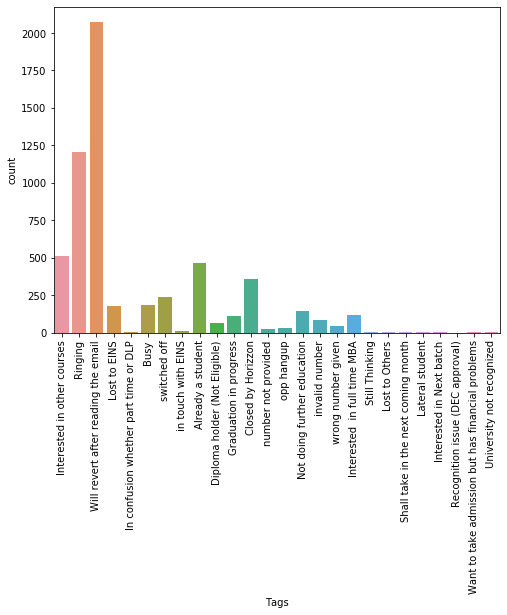

In [262]:
#plotting Tags feature countplot:
fig, axs = plt.subplots(figsize = (8,6))
sns.countplot(lead_study.Tags)
plt.xticks(rotation = 90)

In [263]:
# Blanks in the tag column can be imputed by 'Will revert after reading the email'.
lead_study['Tags'] = lead_study['Tags'].replace(np.nan, 'Will revert after reading the email')

In [264]:
# What matters most to you in choosing a course
lead_study['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [265]:
# Blanks in the this column may be imputed by 'Better Career Prospects' as most of them opt for this purpose.
lead_study['What matters most to you in choosing a course'] = lead_study['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [266]:
#Occupation Feature:
lead_study['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [267]:

lead_study['What is your current occupation'] = lead_study['What is your current occupation'].replace(np.nan, 'Unemployed')

In [268]:
# Country is India for most values so let's impute the same in missing values.
lead_study['Country'] = lead_study['Country'].replace(np.nan, 'India')

In [269]:
#Checking the Null percentages for all the features:
missing_percentages5 = round(100*(lead_study.isnull().sum()/len(lead_study.index)), 2)
missing_percentages5

Prospect ID                                     0.00
Lead Number                                     0.00
Lead Origin                                     0.00
Lead Source                                     0.39
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     1.48
Total Time Spent on Website                     0.00
Page Views Per Visit                            1.48
Last Activity                                   1.11
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                            

<font color = blue size = 5>**Inference** </font>
- Rest of features have missing values less than **2%** only.

In [270]:
#Dropping corresponding rows, if any na present:
lead_study.dropna(inplace = True)

In [271]:
#Checking the Null Percentages for all the features:
missing_percentages6 = round(100*(lead_study.isnull().sum()/len(lead_study.index)), 2)
missing_percentages6

Prospect ID                                     0.00
Lead Number                                     0.00
Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     0.00
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.00
Last Activity                                   0.00
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                            

<font size = 5 color = blue> **Inference:** </font>    
    
- lead case study df don't have any NA values  

<font size = 7 color = Skyblue> **Exploratory Data Analytics:** </font>    
    <br>
    <br>
    <font size = 5 color = Brown> **Data Visualization:** </font>  
    <br>


  <font size = 3 color = Green> **UNIVARIATE ANALYSIS:** </font>  
    <br>

In [272]:
# Converted is the target variable, Indicates whether a lead has been successfully - {converted :(1) or not :(0)}.
Converted = (sum(lead_study['Converted'])/len(lead_study['Converted'].index))*100
Converted

37.85541106458012

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

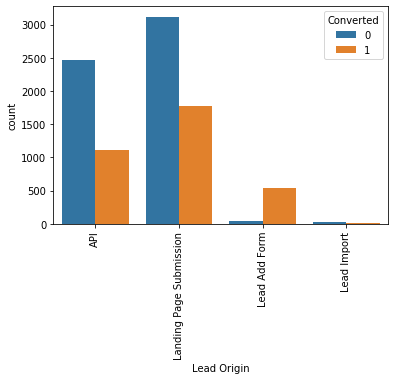

In [273]:
#Lead Origin:
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_study)
plt.xticks(rotation = 90)

<font size = 5 color = blue> **Inference:** </font>    
 
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3. Lead Import are very less in count.

To improve overall 'Lead conversion rate', we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

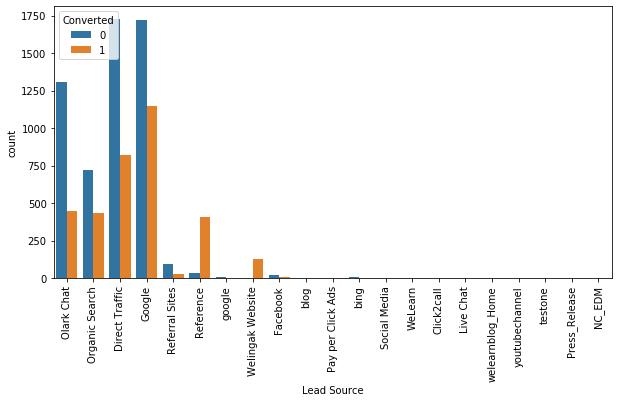

In [274]:
#Plotting Lead Source countplot:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_study)
plt.xticks(rotation = 90)

In [275]:
#Most of the times Lead Source is from Google, for so many other online resources just replace them with 'Others':
lead_study['Lead Source'] = lead_study['Lead Source'].replace(['google'], 'Google')
lead_study['Lead Source'] = lead_study['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

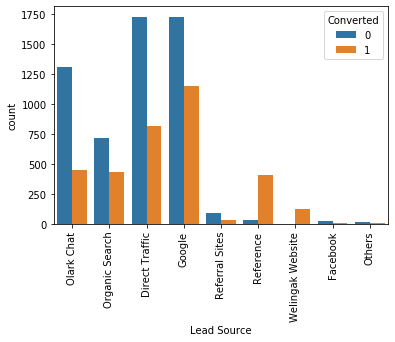

In [276]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_study)
plt.xticks(rotation = 90)

<font size = 5 color = blue> **Inference:** </font>  

1. Google and Direct traffic provides the maximum number of leads to us.
2. Conversion Rate of 'Reference Leads' and 'Leads through welingak website' is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

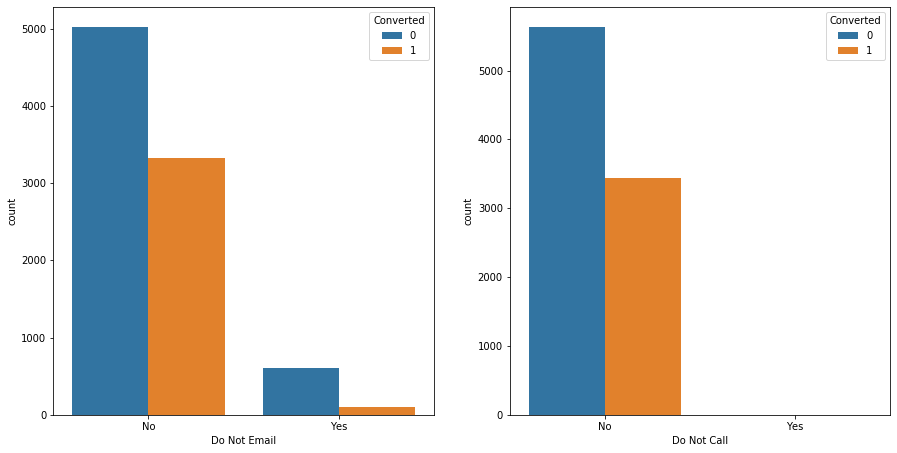

In [277]:
#Do Not Email & Do Not Call
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_study, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_study, ax = axs[1])

In [278]:
#total visits
lead_study['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9074.00
mean       3.46
std        4.86
min        0.00
5%         0.00
25%        1.00
50%        3.00
75%        5.00
90%        7.00
95%       10.00
99%       17.00
max      251.00
Name: TotalVisits, dtype: float64

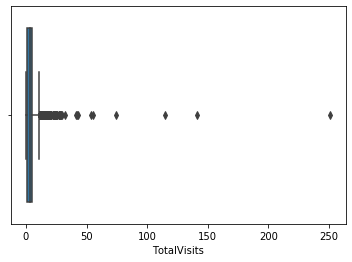

In [279]:
#Boxplot for TotalVisits Feature:

sns.boxplot(lead_study['TotalVisits'])

<font size = 5 color = blue> **Inference:** </font> 
1. As we can see there are a number of outliers in the data.
2. We will cap the outliers to 95% value for analysis.


In [280]:
#Capping outliers:
percentiles = lead_study['TotalVisits'].quantile([0.05,0.95]).values
lead_study['TotalVisits'][lead_study['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_study['TotalVisits'][lead_study['TotalVisits'] >= percentiles[1]] = percentiles[1]

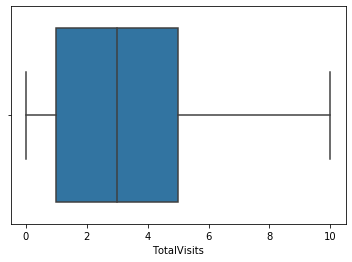

In [281]:
sns.boxplot(lead_study['TotalVisits'])

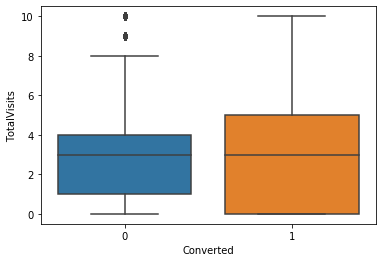

In [282]:
#comparing 'TotalVisits' with Converted:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_study)

<font size = 5 color = blue> **Inference:** </font> 

- After removing outliers the boxplot depicts there are no outliers. But if you compare with Median.
- Median for converted and not converted leads are the same.Nothng conclusive can be said on the basis of Total Visits.

In [283]:
#'Total Time spent on Website' stats:
lead_study['Total Time Spent on Website'].describe()

count   9074.00
mean     482.89
std      545.26
min        0.00
25%       11.00
50%      246.00
75%      922.75
max     2272.00
Name: Total Time Spent on Website, dtype: float64

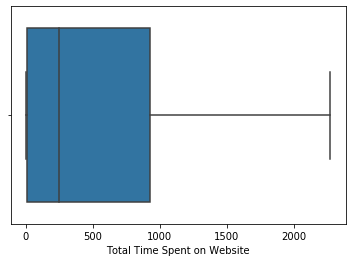

In [284]:
# Boxplot of 'Total Time Spent on Website':
sns.boxplot(lead_study['Total Time Spent on Website'])

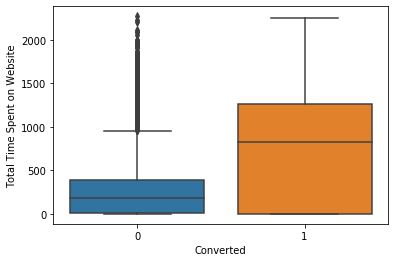

In [285]:
#comparing 'Total Time Spent on Website' with Converted:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_study)

Inference:
Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

In [286]:
# 'Page Views Per Visit' Stats:
lead_study['Page Views Per Visit'].describe()

count   9074.00
mean       2.37
std        2.16
min        0.00
25%        1.00
50%        2.00
75%        3.20
max       55.00
Name: Page Views Per Visit, dtype: float64

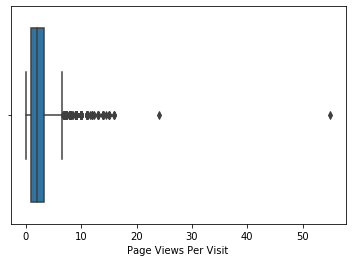

In [287]:
# Before Outlier's capping, Boxplot of 'Page Views Per Visit':
sns.boxplot(lead_study['Page Views Per Visit'])

In [288]:
#Capping outliers between 5-95% range:
percentiles = lead_study['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_study['Page Views Per Visit'][lead_study['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_study['Page Views Per Visit'][lead_study['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

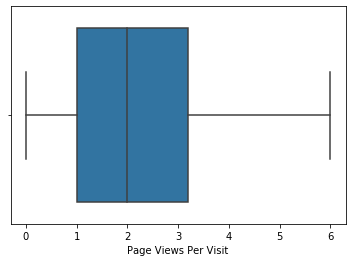

In [289]:
# After Outlier's capping, Boxplot of 'Page Views Per Visit':
sns.boxplot(lead_study['Page Views Per Visit'])

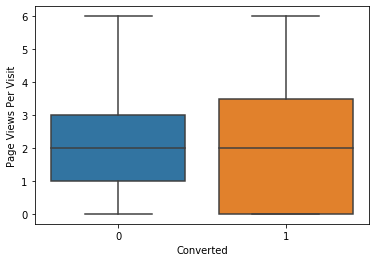

In [290]:
#comparing 'TotalVisits' with Converted:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_study)

Inference:
Median for converted and unconverted leads is the same.
Nothing can be said specifically for lead conversion from Page Views Per Visit

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

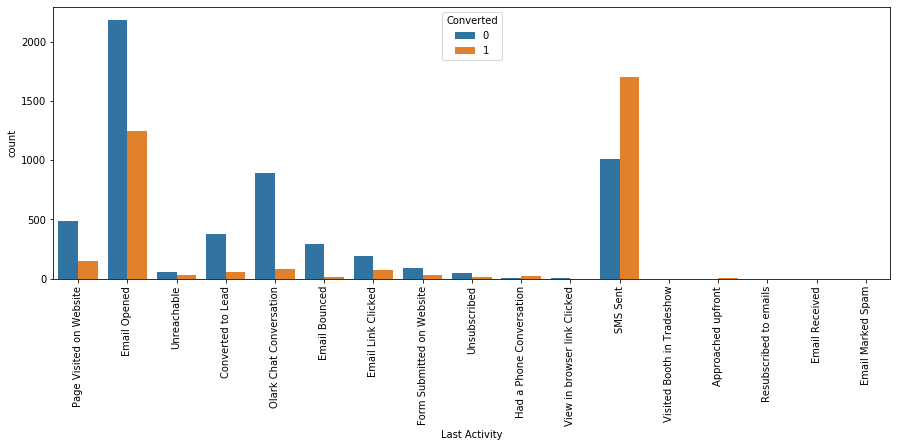

In [291]:
#comparing "Last Activity" with Converted:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_study)
plt.xticks(rotation = 90)

In [292]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead_study['Last Activity'] = lead_study['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

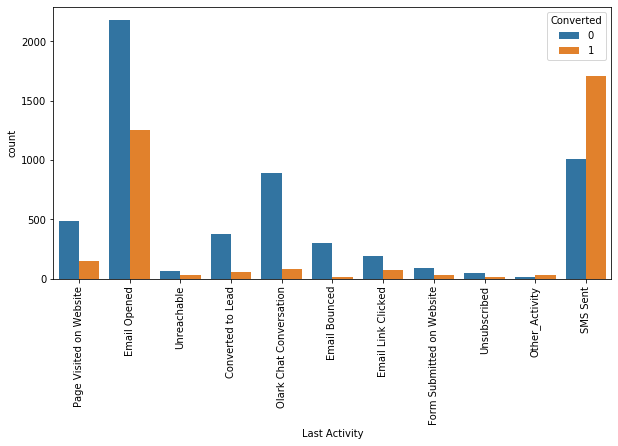

In [293]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_study)
plt.xticks(rotation = 90)

Inference:
    
Most of the lead have their Email opened as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 60%.b

In [294]:
#country
lead_study.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

In [295]:
lead_study.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [296]:
lead_study['Specialization'] = lead_study['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

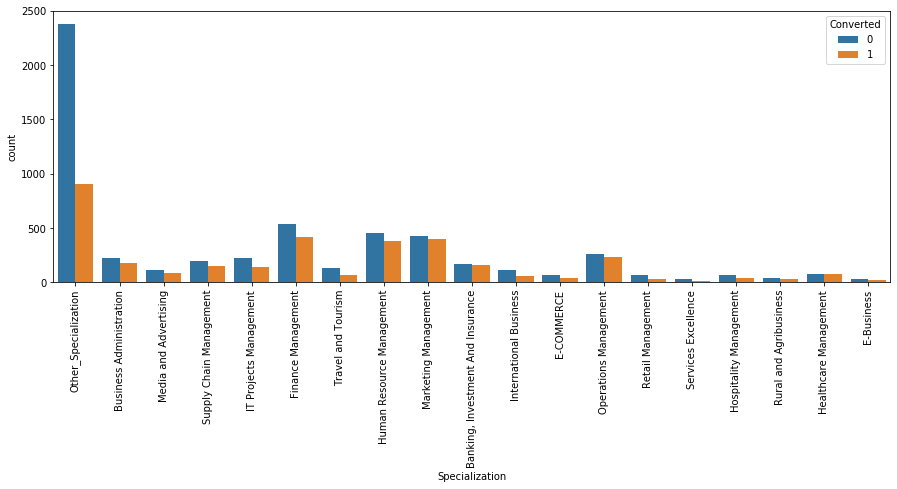

In [297]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_study)
plt.xticks(rotation = 90)

In [298]:
lead_study['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [299]:
lead_study['What is your current occupation'] = lead_study['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

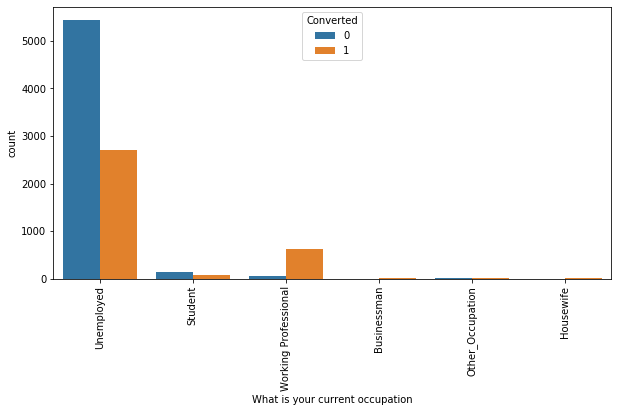

In [300]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_study)
plt.xticks(rotation = 90)

In [301]:
lead_study['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

In [302]:
lead_study.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

Inference:

Most entries are 'No'. No Inference can be drawn with this parameter.

In [303]:
#magazine
lead_study.Magazine.describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

In [304]:
#Newspaper Article
lead_study['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

In [305]:
lead_study['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

In [306]:
lead_study['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

In [307]:
lead_study['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

In [308]:
lead_study['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

In [309]:
lead_study['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [310]:
lead_study.Tags.describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

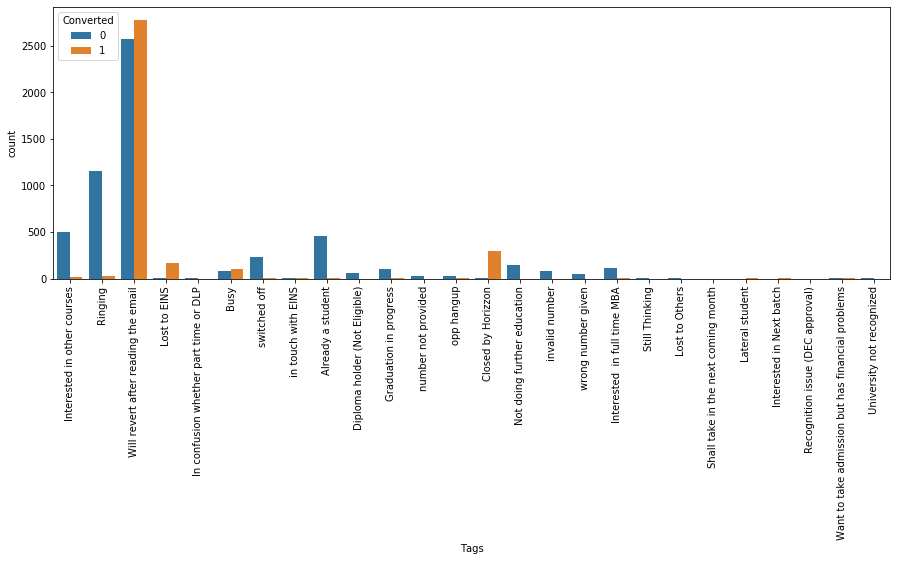

In [311]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_study)
plt.xticks(rotation = 90)

In [312]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead_study['Tags'] = lead_study['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

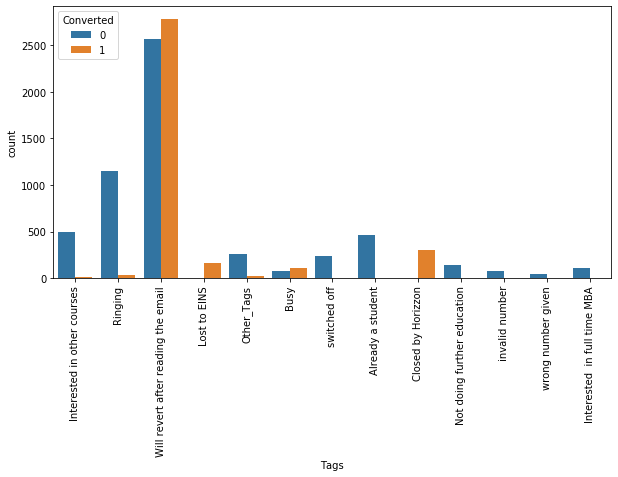

In [313]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_study)
plt.xticks(rotation = 90)

In [314]:
lead_study['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

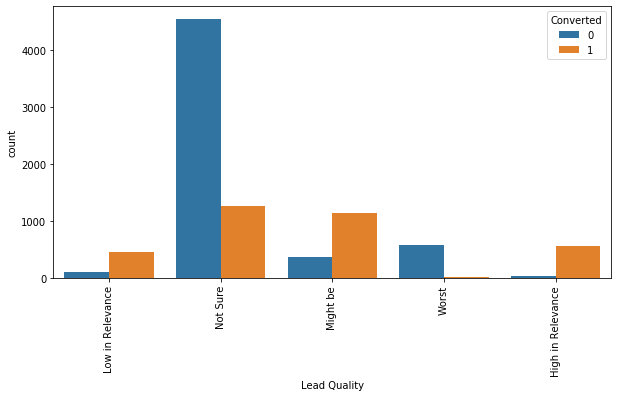

In [315]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead_study)
plt.xticks(rotation = 90)

In [316]:
lead_study['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

In [317]:
lead_study['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [318]:
lead_study['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

In [319]:
lead_study['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

In [320]:
lead_study.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

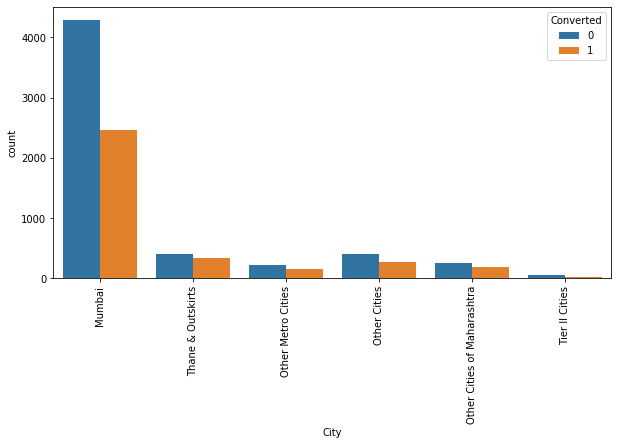

In [321]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = lead_study)
plt.xticks(rotation = 90)

Inference

Most leads are from mumbai with around 30% conversion rate.

In [322]:
lead_study['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

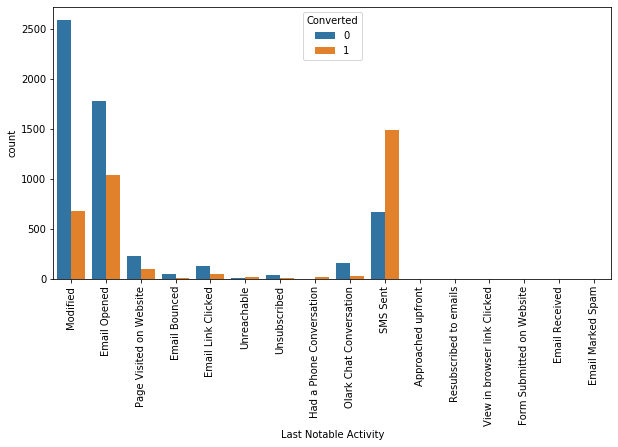

In [323]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_study)
plt.xticks(rotation = 90)

Results:

Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis

In [324]:
lead_study = lead_study.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [325]:
lead_study.shape

(9074, 16)

In [326]:
lead_study.head()


,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


Data Preparation:

Converting some binary variables (Yes/No) to 1/0m

In [327]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_study[varlist] = lead_study[varlist].apply(binary_map)

In [328]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_study[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [329]:
# Adding the results to the master dataframe
lead_study = pd.concat([lead_study, dummy1], axis=1)
lead_study.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.00,0,0.00,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.00,674,2.50,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified

In [330]:
lead_study = lead_study.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [331]:
lead_study.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.00,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.00,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [332]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_study.drop(['Prospect ID','Converted'], axis=1)


In [333]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.00,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.00,1532,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.00,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.00,1428,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [334]:
# Putting response variable to y
y = lead_study['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [335]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [336]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.43,-0.16,-0.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.43,-0.54,-0.16,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.15,-0.89,-1.27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.43,1.64,-0.16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.64,2.02,0.12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [337]:
# Checking the Churn Rate
Converted = (sum(lead_study['Converted'])/len(lead_study['Converted'].index))*100
Converted

37.85541106458012

We have almost 38% conversion

In [338]:
#first training model
import statsmodels.api as sm

In [339]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.0
Date:                Mon, 02 Mar 2020   Deviance:                       2500.0
Time:                        22:02:57   Pearson chi2:                 3.87e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.1432   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.3882      0.327     -4.243      0.000      -2.030      -0.747
Do Not Call                                             23.7150   1.37e+05      0.000      1.000   -2.68e+05    2.68e+05
TotalVisits                                              0.1816      0.087      2.093      0.036       0.012       0.352
Total Time Spent on Website                              1.1457      0.064     17.913      0.000       1.020       1.271
Page Views Per Visit                                    -0.3272      0.099     -3.309      0.001      -0.521      -0.133
Lead Origin_Landing Page Submission                     -0.9762      0.221     -4.420      0.000      -1.409      -0.543
Lead Origin_Lead Add Form                               -0.4165      1.287     -0.324      0.746      -2.940       2.107
Lead Origin_Lead Import                                 29.7289   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.6305   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2017      0.155      1.302      0.193      -0.102       0.505
Lead Source_Olark Chat                                   0.8633      0.234      3.693      0.000       0.405       1.321
Lead Source_Organic Search                               0.2278      0.210      1.083      0.279      -0.185       0.640
Lead Source_Others                                       0.7602      0.816      0.931      0.352      -0.839       2.360
Lead Source_Reference                                    1.7732      1.344      1.319      0.187      -0.861       4.407
Lead Source_Referral Sites                              -0.0945      0.491     -0.193      0.847      -1.056       0.867
Lead Source_Welingak Website                             5.4722      1.486      3.682      0.000       2.559       8.385
Last Activity_Email Bounced                             -0.5488      0.870     -0.631      0.528      -2.254       1.157
Last Activity_Email Link Clicked                         0.8429      0.644      1.309      0.190      -0.419       2.105
Last Activity_Email Opened                              -0.0003      0.384     -0.001      0.999      -0.754       0.753
Last Activity_Form Submitted on Website                  0.1337      0.593      0.225      0.822      -1.028       1.296
Last Activity_Olark Chat Conversation                   -0.5464      0.392     -1.395      0.163      -1.314       0.221
Last Activity_Other_Activity                             1

In [340]:
#Feature Selection Using RFE¶
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [341]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False])

In [342]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 28),
 ('TotalVisits', False, 38),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Others', False, 41),
 ('Lead Source_Reference', False, 65),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 23),
 ('Last Activity_Email Link Clicked', False, 31),
 ('Last Activity_Email Opened', False, 55),
 ('Last Activity_Form Submitted on Website', False, 61),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Other_Activity', False, 3),
 ('Last Activity_Page Visited on Website', False, 32),
 ('Last Activity_SMS Sent', Fal

In [343]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [344]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',


In [345]:
#Assessing the model with StatsModels¶
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1327.8
Date:                Mon, 02 Mar 2020   Deviance:                       2655.5
Time:                        22:02:58   Pearson chi2:                 2.49e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6945      0.241     -7.019      0.000      -2.168      -1.221
Do Not Email                                            -1.2264      0.243     -5.047      0.000      -1.703      -0.750
Total Time Spent on Website                              1.1552      0.061     18.869      0.000       1.035       1.275
Lead Origin_Lead Add Form                                2.3009      0.370      6.218      0.000       1.576       3.026
Lead Origin_Lead Import                                  1.7725      0.770      2.303      0.021       0.264       3.281
Lead Source_Olark Chat                                   1.1322      0.140      8.101      0.000       0.858       1.406
Lead Source_Welingak Website                             3.4235      0.831      4.120      0.000       1.795       5.052
What is your current occupation_Working Professional     1.2901      0.326      3.954      0.000       0.651       1.930
Tags_Busy                                                3.1633      0.341      9.277      0.000       2.495       3.832
Tags_Closed by Horizzon                                  7.9198      0.792      9.995      0.000       6.367       9.473
Tags_Lost to EINS                                        8.8025      0.768     11.462      0.000       7.297      10.308
Tags_Ringing                                            -2.0242      0.356     -5.694      0.000      -2.721      -1.327
Tags_Will revert after reading the email                 3.4936      0.242     14.429      0.000       3.019       3.968
Tags_invalid number                                    -23.7006   2.22e+04     -0.001      0.999   -4.35e+04    4.34e+04
Tags_switched off                                       -2.7649      0.635     -4.356      0.000      -4.009      -1.521
Tags_wrong number given                                -23.3363   3.01e+04     -0.001      0.999   -5.91e+04    5.91e+04
Lead Quality_Not Sure                                   -3.1401      0.141    -22.335      0.000      -3.416      -2.865
Lead Quality_Worst                                      -4.0228      0.838     -4.803      0.000      -5.664      -2.381
Last Notable Activity_Modified                          -0.9913      0.120     -8.260      0.000      -1.227      -0.756
Last Notable Activity_Olark Chat Conversation           -1.6347      0.408     -4.005      0.000      -2.435      -0.835
Last Notable Activity_SMS Sent                           2.2589      0.139     16.253      0.000       1.986       2.531
========================================================================================================================
"""

In [346]:
col1 = col.drop('Tags_invalid number',1)


In [347]:
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [348]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1332.8
Date:                Mon, 02 Mar 2020   Deviance:                       2665.5
Time:                        22:02:58   Pearson chi2:                 2.44e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8433      0.241     -7.638      0.000      -2.316      -1.370
Do Not Email                                            -1.2153      0.242     -5.014      0.000      -1.690      -0.740
Total Time Spent on Website                              1.1571      0.061     18.932      0.000       1.037       1.277
Lead Origin_Lead Add Form                                2.3334      0.371      6.283      0.000       1.605       3.061
Lead Origin_Lead Import                                  1.7741      0.768      2.309      0.021       0.268       3.280
Lead Source_Olark Chat                                   1.1358      0.139      8.144      0.000       0.862       1.409
Lead Source_Welingak Website                             3.3870      0.831      4.076      0.000       1.758       5.016
What is your current occupation_Working Professional     1.3257      0.329      4.032      0.000       0.681       1.970
Tags_Busy                                                3.3185      0.340      9.766      0.000       2.652       3.985
Tags_Closed by Horizzon                                  8.0485      0.793     10.152      0.000       6.495       9.602
Tags_Lost to EINS                                        8.9303      0.768     11.626      0.000       7.425      10.436
Tags_Ringing                                            -1.8531      0.353     -5.249      0.000      -2.545      -1.161
Tags_Will revert after reading the email                 3.6352      0.242     14.996      0.000       3.160       4.110
Tags_switched off                                       -2.5868      0.633     -4.086      0.000      -3.828      -1.346
Tags_wrong number given                                -22.1787   1.83e+04     -0.001      0.999   -3.59e+04    3.58e+04
Lead Quality_Not Sure                                   -3.1279      0.140    -22.307      0.000      -3.403      -2.853
Lead Quality_Worst                                      -3.9545      0.844     -4.686      0.000      -5.608      -2.301
Last Notable Activity_Modified                          -0.9886      0.120     -8.234      0.000      -1.224      -0.753
Last Notable Activity_Olark Chat Conversation           -1.6411      0.408     -4.022      0.000      -2.441      -0.841
Last Notable Activity_SMS Sent                           2.2237      0.138     16.156      0.000       1.954       2.493
========================================================================================================================
"""

In [349]:
col2 = col1.drop('Tags_wrong number given',1)

In [350]:
col2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [351]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1335.7
Date:                Mon, 02 Mar 2020   Deviance:                       2671.5
Time:                        22:02:59   Pearson chi2:                 2.44e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9502      0.241     -8.104      0.000      -2.422      -1.479
Do Not Email                                            -1.2091      0.242     -4.994      0.000      -1.684      -0.735
Total Time Spent on Website                              1.1529      0.061     18.911      0.000       1.033       1.272
Lead Origin_Lead Add Form                                2.3477      0.373      6.296      0.000       1.617       3.079
Lead Origin_Lead Import                                  1.7144      0.750      2.287      0.022       0.245       3.184
Lead Source_Olark Chat                                   1.1338      0.139      8.136      0.000       0.861       1.407
Lead Source_Welingak Website                             3.3660      0.831      4.049      0.000       1.737       4.995
What is your current occupation_Working Professional     1.3482      0.331      4.076      0.000       0.700       1.997
Tags_Busy                                                3.4300      0.338     10.137      0.000       2.767       4.093
Tags_Closed by Horizzon                                  8.1437      0.793     10.272      0.000       6.590       9.698
Tags_Lost to EINS                                        9.0244      0.768     11.753      0.000       7.520      10.529
Tags_Ringing                                            -1.7371      0.351     -4.950      0.000      -2.425      -1.049
Tags_Will revert after reading the email                 3.7413      0.242     15.490      0.000       3.268       4.215
Tags_switched off                                       -2.4682      0.632     -3.908      0.000      -3.706      -1.230
Lead Quality_Not Sure                                   -3.1266      0.140    -22.326      0.000      -3.401      -2.852
Lead Quality_Worst                                      -3.8773      0.852     -4.552      0.000      -5.547      -2.208
Last Notable Activity_Modified                          -0.9840      0.120     -8.198      0.000      -1.219      -0.749
Last Notable Activity_Olark Chat Conversation           -1.6385      0.408     -4.019      0.000      -2.438      -0.840
Last Notable Activity_SMS Sent                           2.2136      0.137     16.149      0.000       1.945       2.482
========================================================================================================================
"""

In [352]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009   0.18
1012   0.14
9226   0.00
4750   0.94
7987   0.99
1281   0.99
2880   0.09
4971   0.94
7536   0.99
1248   0.00
dtype: float64

In [353]:
#Reshape to match numpy format:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.79427189e-01, 1.39556181e-01, 4.57781100e-04, 9.41185874e-01,
       9.94982624e-01, 9.93704916e-01, 8.69407216e-02, 9.40577942e-01,
       9.92971786e-01, 3.48531992e-03])

In [354]:
#Adding converted (Target) feature:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.18,3009
1,0,0.14,1012
2,0,0.00,9226
3,1,0.94,4750
4,1,0.99,7987


In [355]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.18,3009,0
1,0,0.14,1012,0
2,0,0.00,9226,0
3,1,0.94,4750,1
4,1,0.99,7987,1


In [356]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3702  203]
 [ 290 2156]]


In [357]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9223744292237442


In [358]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [359]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,3.36
11,Tags_Will revert after reading the email,3.29
17,Last Notable Activity_SMS Sent,1.86
2,Lead Origin_Lead Add Form,1.82
4,Lead Source_Olark Chat,1.64
10,Tags_Ringing,1.57
1,Total Time Spent on Website,1.43
5,Lead Source_Welingak Website,1.37
6,What is your current occupation_Working Profes...,1.27
8,Tags_Closed by Horizzon,1.22


In [360]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [361]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8814390842191333

In [362]:
# Let us calculate specificity
TN / float(TN+FP)

0.9480153649167734

In [363]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.051984635083226635


In [364]:
# positive predictive value 
print (TP / float(TP+FP))

0.913946587537092


In [365]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9273547094188377


Step 9: Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [366]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [367]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

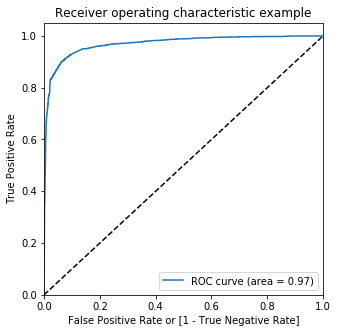

In [368]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [369]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.18,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.14,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.94,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.99,7987,1,1,1,1,1,1,1,1,1,1,1


In [370]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.39   1.00   0.00
0.10  0.10      0.84   0.97   0.75
0.20  0.20      0.89   0.95   0.85
0.30  0.30      0.92   0.92   0.92
0.40  0.40      0.92   0.90   0.93
0.50  0.50      0.92   0.88   0.95
0.60  0.60      0.92   0.85   0.97
0.70  0.70      0.92   0.83   0.98
0.80  0.80      0.90   0.76   0.99
0.90  0.90      0.87   0.68   0.99


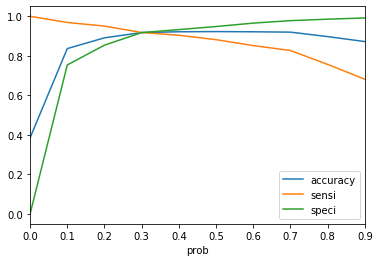

In [371]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [372]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.18,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.14,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.94,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.99,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [373]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.18,3009,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.14,1012,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.94,4750,1,1,1,1,1,1,1,1,1,1,1,1,94
4,1,0.99,7987,1,1,1,1,1,1,1,1,1,1,1,1,99


In [374]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [375]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9501226492232215

In [376]:
# Let us calculate specificity
TN / float(TN+FP)

0.8537772087067862

In [377]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14622279129321383


In [378]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8027633851468048


In [379]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9646990740740741


In [380]:
#Precision and Recall
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3702,  203],
       [ 290, 2156]])

In [381]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.913946587537092

In [382]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8814390842191333

In [383]:
#Using sklearn utilities for the same

from sklearn.metrics import precision_score, recall_score

In [384]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.913946587537092

In [385]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8814390842191333

In [386]:
from sklearn.metrics import precision_recall_curve


In [387]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [388]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

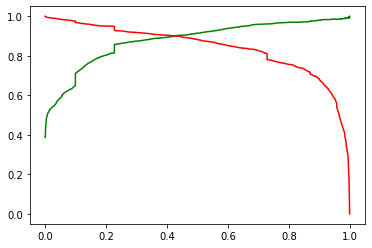

In [389]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [390]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.43,-0.16,-0.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.43,-0.54,-0.16,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.15,-0.89,-1.27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.43,1.64,-0.16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.64,2.02,0.12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [391]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
3271,0,-0.59,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1490,0,1.89,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
7936,0,-0.74,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4216,0,-0.88,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3830,0,-0.58,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [392]:
X_test_sm = sm.add_constant(X_test)



In [393]:
X_test_sm.shape

(2723, 19)

In [394]:
y_test_pred = res.predict(X_test_sm)

In [395]:
y_test_pred[:10]

3271   0.12
1490   1.00
7936   0.10
4216   1.00
3830   0.12
1800   0.91
6507   0.00
4821   0.00
4223   1.00
4714   0.10
dtype: float64

In [396]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [397]:
# Let's see the head
y_pred_1.head()

,0
3271,0.12
1490,1.00
7936,0.10
4216,1.00
3830,0.12


In [398]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [399]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [400]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [401]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [402]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.12
1,1,1490,1.00
2,0,7936,0.10
3,1,4216,1.00
4,0,3830,0.12


In [403]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [404]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

In [405]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.12
1,1490,1,1.00
2,7936,0,0.10
3,4216,1,1.00
4,3830,0,0.12


In [406]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [407]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.12,0
1,1490,1,1.00,1
2,7936,0,0.10,0
3,4216,1,1.00,1
4,3830,0,0.12,0


In [408]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8769739258171135

In [409]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1455,  279],
       [  56,  933]])

In [410]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [411]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9433771486349848

In [412]:
# Let us calculate specificity
TN / float(TN+FP)

0.8391003460207612

In [414]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
final_params = res.params[1:]
final_params

Do Not Email                                           -1.21
Total Time Spent on Website                             1.15
Lead Origin_Lead Add Form                               2.35
Lead Origin_Lead Import                                 1.71
Lead Source_Olark Chat                                  1.13
Lead Source_Welingak Website                            3.37
What is your current occupation_Working Professional    1.35
Tags_Busy                                               3.43
Tags_Closed by Horizzon                                 8.14
Tags_Lost to EINS                                       9.02
Tags_Ringing                                           -1.74
Tags_Will revert after reading the email                3.74
Tags_switched off                                      -2.47
Lead Quality_Not Sure                                  -3.13
Lead Quality_Worst                                     -3.88
Last Notable Activity_Modified                         -0.98
Last Notable Activity_Ol

In [425]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = final_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending=False)

Tags_Lost to EINS                                      100.00
Tags_Closed by Horizzon                                 90.24
Tags_Will revert after reading the email                41.46
Tags_Busy                                               38.01
Lead Source_Welingak Website                            37.30
Lead Origin_Lead Add Form                               26.01
Last Notable Activity_SMS Sent                          24.53
Lead Origin_Lead Import                                 19.00
What is your current occupation_Working Professional    14.94
Total Time Spent on Website                             12.78
Lead Source_Olark Chat                                  12.56
Last Notable Activity_Modified                         -10.90
Do Not Email                                           -13.40
Last Notable Activity_Olark Chat Conversation          -18.16
Tags_Ringing                                           -19.25
Tags_switched off                                      -27.35
Lead Qua

In [426]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            14
Total Time Spent on Website                             13
Lead Origin_Lead Add Form                               12
Lead Origin_Lead Import                                 10
Lead Source_Olark Chat                                  16
Lead Source_Welingak Website                             0
What is your current occupation_Working Professional    15
Tags_Busy                                                4
Tags_Closed by Horizzon                                  1
Tags_Lost to EINS                                        6
Tags_Ringing                                             3
Tags_Will revert after reading the email                17
Tags_switched off                                        2
Lead Quality_Not Sure                                    5
Lead Quality_Worst                                       7
Last Notable Activity_Modified                          11
Last Notable Activity_Olark Chat Conversation           

<Figure size 864x576 with 0 Axes>

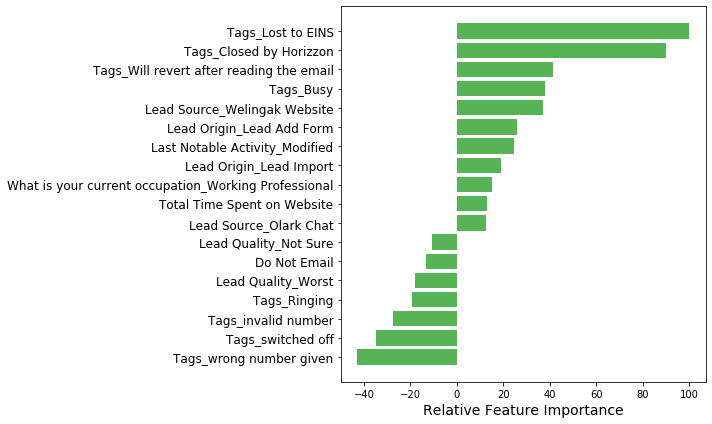

In [432]:
#Plot showing the feature variables based on their relative coefficient values
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:green',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(col)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

<font size = 5 color = Green> **Suggestions/Recommendations:** </font> 

Using the confusion matrix, we got the specificity of 83.9 % sensitivity and accuracy are 94.3 % and 87.7% respectively.

We can depict the features provide more valuable are: 

1.	Total Number of visits

2.	Lead Source’s like: a) Google b) Direct Traffic c) Organic Search d) Welingak website

3.	Total time spent on website.

4.	Lead Origin: Lead add format

5.	SMS Olark chat conversation

6.	Working professional

Using these features X Education can make Leads converted.
